# 33 scikit-learn中的多项式回归和Pipeline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [5]:
X2.shape

(100, 3)

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

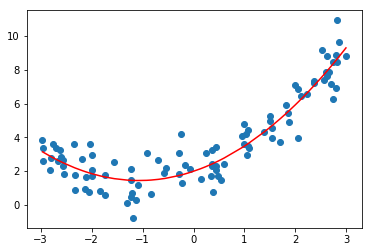

In [7]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color='r')
plt.show()

In [8]:
lin_reg2.coef_

array([0.        , 1.02005596, 0.47576027])

### 关于PolynomialFeatures

In [9]:
X = np.arange(1, 11).reshape(-1, 2)

In [10]:
X.shape

(5, 2)

In [11]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [12]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [13]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

In [14]:
poly = PolynomialFeatures(degree=3)
poly.fit(X)
X3 = poly.transform(X)
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

# Pipeline

In [15]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, 100)

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [17]:
poly_reg.fit(X,y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [18]:
y_predict = poly_reg.predict(X)

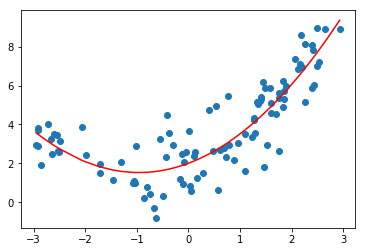

In [19]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()